In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

P = "../data/processed/"
df = pd.read_csv(P + "MASTER_statewise_core_crime_dataset.csv")
df.head()


,state_ut,2020,2021,2022,Mid-Year Projected Population (in Lakhs) (2022),Rate of Cognizable Crimes (IPC) (2022),Chargesheeting Rate (2022),population_2011,literacy_rate_2011,urbanization_rate_2011,...,Adult Victims - 62 Years and above - Tr - Col.(33),Adult Victims - 63 Years and above - T - Col.(34),Adult Victims - Total Adult Victims - M - Col.(35),Adult Victims - Total Adult Victims - F - Col.(36),Adult Victims - Total Adult Victims - Tr - Col.(37),Adult Victims - Total Adult Victims - T - Col.(38),Total Victims (Child + Adult) - M - Col.(39),Total Victims (Child + Adult) - F - Col.(40),Total Victims (Child + Adult) - Tr - Col.(41),Total Victims (Child + Adult) - T - Col.(42)
0,Andhra Pradesh,188997,179611,158547,530.3,299.0,86.5,49577103.0,67.02,29.47,...,0.0,2.0,142.0,231.0,0.0,373.0,171.0,756.0,0.0,927.0
1,Arunachal Pradesh,2244,2626,2308,15.5,148.8,47.2,1383727.0,65.38,22.94,...,0.0,0.0,18.0,19.0,0.0,37.0,26.0,55.0,0.0,81.0
2,Assam,111558,119883,59315,354.9,167.1,32.6,31205576.0,72.19,14.08,...,0.0,63.0,342.0,2807.0,0.0,3149.0,645.0,4601.0,0.0,5246.0
3,Bihar,194698,186006,211079,1255.3,168.1,75.4,104099452.0,61.80,11.30,...,0.0,26.0,1104.0,5691.0,0.0,6795.0,1632.0,10190.0,0.0,11822.0
4,Chhattisgarh,65216,70519,73822,299.5,246.5,80.4,25545198.0,70.28,23.24,...,0.0,0.0,29.0,12.0,0.0,41.0,559.0,2218.0,0.0,2777.0


In [3]:
#Feature Selection And Target
features = [
    "literacy_rate_2011",
    "urbanization_rate_2011",
    "murder_rate_2022",
    "Chargesheeting Rate (2022)"
]

target = "Rate of Cognizable Crimes (IPC) (2022)"

X = df[features]
y = df[target]

# handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)



In [6]:
#Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)




In [7]:
#Random Forest Regression
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
#Model Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation")
    print("-" * 30)
    print("R2 Score :", r2_score(y_true, y_pred))
    print("MAE      :", mean_absolute_error(y_true, y_pred))
    print("RMSE     :", np.sqrt(mean_squared_error(y_true, y_pred)))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



Linear Regression Evaluation
------------------------------
R2 Score : -10.31844849350193
MAE      : 128.8759176494063
RMSE     : 214.682524775907

Random Forest Evaluation
------------------------------
R2 Score : -12.167270194708665
MAE      : 147.1370333333337
RMSE     : 231.5533766232126


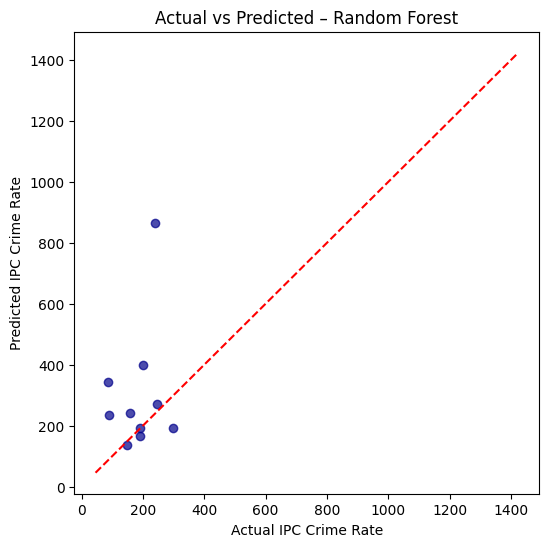

In [9]:
#Prediction vs Actual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, color="darkblue", alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual IPC Crime Rate")
plt.ylabel("Predicted IPC Crime Rate")
plt.title("Actual vs Predicted – Random Forest")
plt.show()


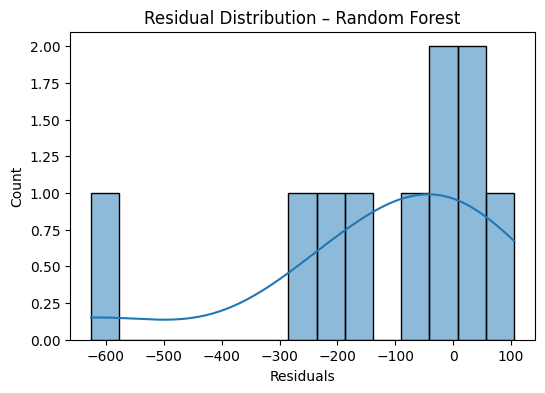

In [10]:
#Residual Plot
residuals = y_test - y_pred_rf

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=15, kde=True)
plt.title("Residual Distribution – Random Forest")
plt.xlabel("Residuals")
plt.show()


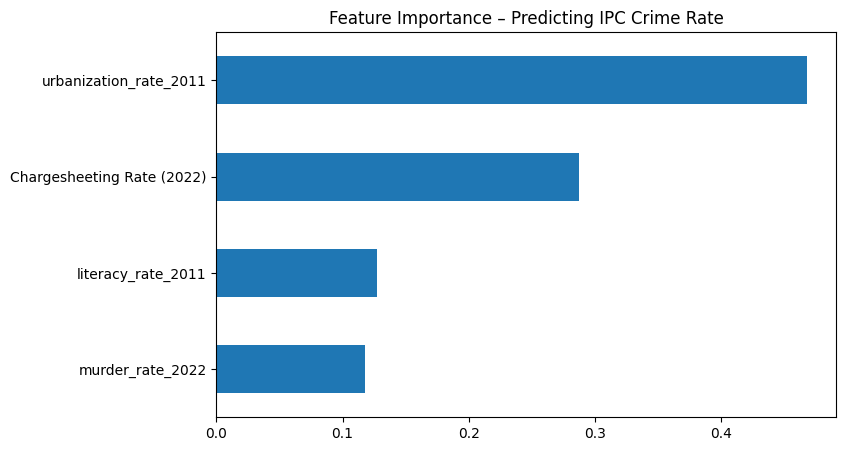

In [11]:
#Feature Importance Plot
importance = pd.Series(
    rf.feature_importances_,
    index=features
).sort_values()

importance.plot(
    kind="barh",
    figsize=(8,5),
    title="Feature Importance – Predicting IPC Crime Rate"
)
plt.show()


In [16]:
#K means Clustering
cluster_features = df[
    [
        "Rate of Cognizable Crimes (IPC) (2022)",
        "murder_rate_2022",
        "literacy_rate_2011",
        "urbanization_rate_2011"
    ]
].copy()

# ensure numeric and fill missing with column means (avoid computing mean over entire df)
cluster_features = cluster_features.apply(pd.to_numeric, errors="coerce")
cluster_features = cluster_features.fillna(cluster_features.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=4, random_state=42)
df["crime_cluster"] = kmeans.fit_predict(X_scaled)
df[["state_ut", "crime_cluster"]].head(10)



,state_ut,crime_cluster
0,Andhra Pradesh,0
1,Arunachal Pradesh,2
2,Assam,2
3,Bihar,2
4,Chhattisgarh,2
5,Goa,0
6,Gujarat,0
7,Haryana,2
8,Himachal Pradesh,0
9,Jharkhand,2


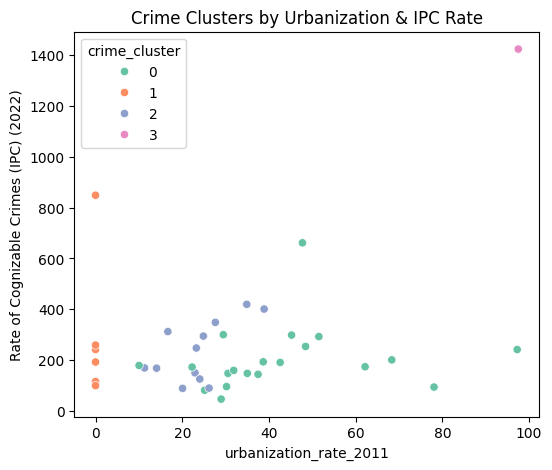

In [15]:
#Cluster Visualization
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=df["urbanization_rate_2011"],
    y=df["Rate of Cognizable Crimes (IPC) (2022)"],
    hue=df["crime_cluster"],
    palette="Set2"
)
plt.title("Crime Clusters by Urbanization & IPC Rate")
plt.show()


In [17]:
#PCA Transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)
pca_df["cluster"] = df["crime_cluster"]


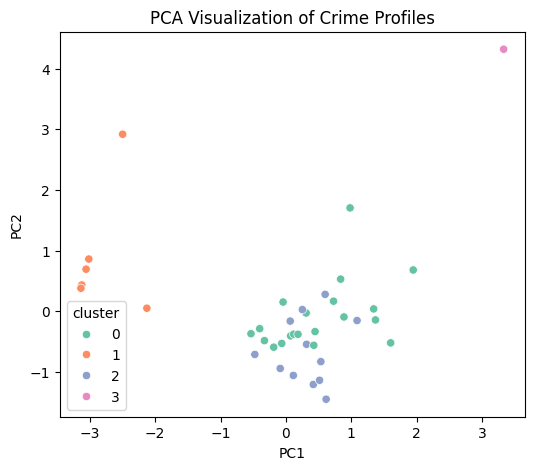

In [18]:
#PCA Scatter Plot
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="cluster",
    palette="Set2"
)
plt.title("PCA Visualization of Crime Profiles")
plt.show()


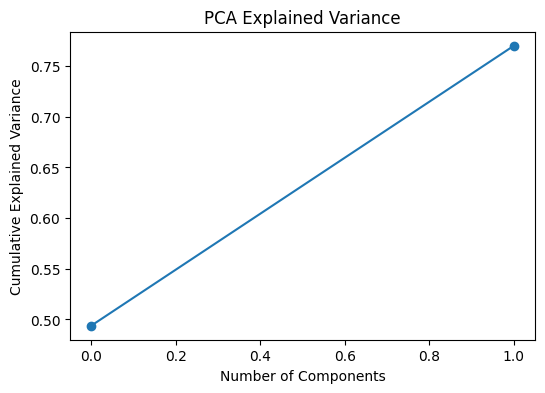

In [19]:
#PCA EXplained Variance Plot
plt.figure(figsize=(6,4))
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker="o"
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()
